- https://biopython.org/wiki/SeqIO
- https://docs.python.org/ja/3/library/xml.etree.elementtree.html
- https://biopython.org/docs/1.75/api/Bio.Align.html
- https://biopython.org/docs/1.75/api/Bio.Align.substitution_matrices.html

In [2]:
from Bio import SeqIO
from Bio import motifs
from Bio import SeqUtils
from Bio.SeqRecord import SeqRecord
from Bio import Align
from Bio.Align import substitution_matrices

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import seaborn as sns
from icecream import ic

plt.style.use('default')

plt.style.use('classic')
import importlib
import plt_configs; importlib.reload(plt_configs)

import sequence_utils; importlib.reload(sequence_utils)

<module 'sequence_utils' from '/home/user/gong-proj/first_eval/sequence_utils.py'>

In [4]:
gb_file = 'sequence/adhesive proteins sequence.gp'

In [5]:
# %%file -a utils.py
class obj:
    def __init__(self, rec):
        self.id = rec.id
        self.name = rec.name
        self.features = rec.features # list[SeqFeature]
        self.description = rec.description
        self.taxonomy = rec.annotations['taxonomy']
        self.organism = rec.annotations['organism']
        self.source = rec.annotations['source']
        self.seq = rec.seq # Seq
    def __repr__(self):
        return f'{self.name} ({len(self.seq)} aa, {len(self.features)} feat) {self.description}'

In [6]:
"""Load records."""
max_limit = 10
read = 0

seqs = []
records = []

for rec in SeqIO.parse(gb_file, 'genbank'):
    if rec.annotations['source'] == 'Unknown': # skip unknown
        continue
        
    if len(rec.annotations['taxonomy']) == 0: # skip no taxonomy
        continue
    
    is_protein = False
    for feature in rec.features:
        if feature.type == 'Protein':
            seq_slice = feature.location.extract(rec.seq)
            assert len(seq_slice) == len(rec.seq)
            is_protein = True
    if is_protein == False: # skip no protein feature
        continue
    
    read += 1
    
    if read % 1000 == 0:
        print('read', read)
    # print(rec.id, len(rec.seq), len(rec.features)) # WP_167075582.1 149 2
    # print(rec.name) # WP_133310582
    # print(rec.annotations['source'])
    # print(rec.annotations['organism'])
    # print(rec.annotations['taxonomy']) # list ['Bacteria', 'Firmicutes', 'Bacilli', 'Bacillales', 'Bacillaceae', 'Bacillus']
    
    r = SeqRecord(rec.seq, rec.id, rec.name, rec.description)
    seqs.append(r) # t.List[SeqRecord] # Not used.
    records.append(obj(rec)) # t.List[obj]
    #if read > max_limit:
    #    break

/home/user/miniconda3/envs/deep/lib/python3.7/site-packages/Bio/GenBank/__init__.py:1144: BiopythonParserWarning: Dropping bond qualifier in feature location
  "Dropping bond qualifier in feature location", BiopythonParserWarning
/home/user/miniconda3/envs/deep/lib/python3.7/site-packages/Bio/GenBank/Scanner.py:1797: BiopythonParserWarning: Structured comment not parsed for JAV42696. Is it malformed?
  BiopythonParserWarning,


read 1000
read 2000
read 3000
read 4000
read 5000
read 6000
read 7000
read 8000
read 9000
read 10000
read 11000
read 12000
read 13000
read 14000
read 15000
read 16000
read 17000
read 18000
read 19000
read 20000
read 21000
read 22000
read 23000
read 24000


In [7]:
# SeqIO.write(seqs, 'proteins.fa', 'fasta')

In [7]:
def print_example(ex):
    ic(ex.id, ex.name, ex.features, ex.description, ex.taxonomy, ex.organism, ex.source, ex.seq)



In [11]:
ex = records[1]
        # self.id = rec.id
        # self.name = rec.name
        # self.features = rec.features # list[SeqFeature]
        # self.description = rec.description
        # self.taxonomy = rec.annotations['taxonomy']
        # self.organism = rec.annotations['organism']
        # self.source = rec.annotations['source']
        # self.seq = rec.seq # Seq
ic(ex.id, ex.name, ex.features, ex.description, ex.taxonomy, ex.organism, ex.source, ex.seq)

ic| ex.id: 'WP_133310582.1'
    ex.name: 'WP_133310582'
    ex.features: [SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(322)), type='source'),
                  SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(322)), type=

'Protein')]
    ex.description: 'cell wall-binding repeat-containing protein [[Brevibacterium] frigoritolerans]'
    ex.taxonomy: ['Bacteria', 'Firmicutes', 'Bacilli', 'Bacillales', 'Bacillaceae', 'Bacillus']
    ex.organism: '[Brevibacterium] frigoritolerans'
    ex.source: '[Brevibacterium] frigoritolerans'
    ex.seq: Seq('MKKSLALSALLVLSLPFGQASAASAPETTRIYGLDRYETSADISYMGWESSEVA...LFK')


('WP_133310582.1',
 'WP_133310582',
 [SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(322)), type='source'),
  SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(322)), type='Protein')],
 'cell wall-binding repeat-containing protein [[Brevibacterium] frigoritolerans]',
 ['Bacteria',
  'Firmicutes',
  'Bacilli',
  'Bacillales',
  'Bacillaceae',
  'Bacillus'],
 '[Brevibacterium] frigoritolerans',
 '[Brevibacterium] frigoritolerans',
 Seq('MKKSLALSALLVLSLPFGQASAASAPETTRIYGLDRYETSADISYMGWESSEVA...LFK'))

### Dist of o.seq

In [7]:
dist = [len(o.seq) for o in records]

In [10]:
# df = pd.DataFrame(dist, columns=['dist'])
# g = sns.displot(df, x='dist', kind='hist', bins=20, kde=True, height=7)
# g.set_xlabels('Sequence length')
# g.set_ylabels('Frequency')
# g.set(title='Sequence length of 24707 proteins')
# g.savefig('sns_figs/all_seq_dist.pdf')

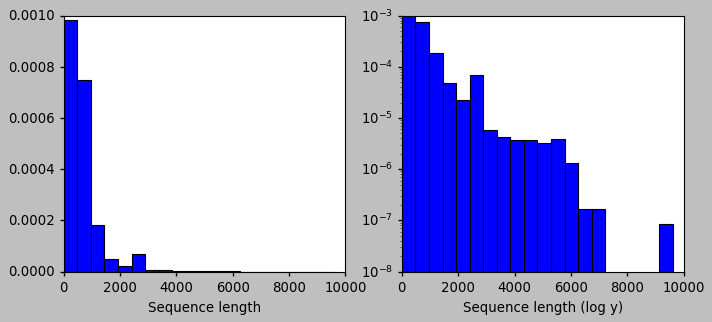

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(dist, bins=20, density=True)
# ax[0].set_title('sequence length of 24707 proteins')
ax[0].set_xlabel('Sequence length')
# ax[0].set_ylabel('Frequency')
ax[1].hist(dist, bins=20, log=True, density=True)
# ax[1].set_title('histogram (y axis: log)')
ax[1].set_xlabel('Sequence length (log y)')
# plt.show()
plt.savefig('modified_figs/overal_seq_len_dist.pdf', bbox_inches='tight')

In [10]:
pd.Series(dist).describe()

count    24707.000000
mean       673.263205
std        676.344352
min          4.000000
25%        318.000000
50%        510.000000
75%        750.000000
max       9624.000000
dtype: float64

### Organisms: Show all the organism names, Dist of o.organism

In [16]:
org = [o.organism for o in records] # show dist of organism

In [17]:
ic(len(org))

ic| len(org): 24707


24707

In [18]:
c = collections.Counter(org)
ic(type(c))
ic(len(c))
c.most_common(20)
# with open('orgnisms.txt', 'w') as f:
#     for item in c.items():
#         f.write(f'{item}' + '\n')



ic| type(c): <class 'collections.Counter'>
ic| len(c): 3822


[('Lacticaseibacillus paracasei subsp. paracasei', 3189),
 ('Clostridioides difficile', 1059),
 ('Escherichia coli', 419),
 ('Homo sapiens', 363),
 ('Plasmodium vivax', 345),
 ('Finegoldia magna', 294),
 ('Plasmodium falciparum', 292),
 ('Mobiluncus mulieris', 276),
 ('Mus musculus', 222),
 ('Clostridium tetani', 177),
 ('Clostridium botulinum', 165),
 ('Mobiluncus curtisii', 158),
 ('Cutibacterium acnes', 155),
 ('Babesia bovis', 127),
 ('Euzebya sp. DY32-46', 116),
 ('Clostridium sporogenes', 109),
 ('Peptostreptococcus anaerobius', 102),
 ('Euzebya rosea', 100),
 ('Babesia gibsoni', 96),
 ('Klebsiella pneumoniae', 95)]

In [19]:
for k, v in c.most_common(20):
    print(f'{k} ({v})')

Lacticaseibacillus paracasei subsp. paracasei (3189)
Clostridioides difficile (1059)
Escherichia coli (419)
Homo sapiens (363)
Plasmodium vivax (345)
Finegoldia magna (294)
Plasmodium falciparum (292)
Mobiluncus mulieris (276)
Mus musculus (222)
Clostridium tetani (177)
Clostridium botulinum (165)
Mobiluncus curtisii (158)
Cutibacterium acnes (155)
Babesia bovis (127)
Euzebya sp. DY32-46 (116)
Clostridium sporogenes (109)
Peptostreptococcus anaerobius (102)
Euzebya rosea (100)
Babesia gibsoni (96)
Klebsiella pneumoniae (95)


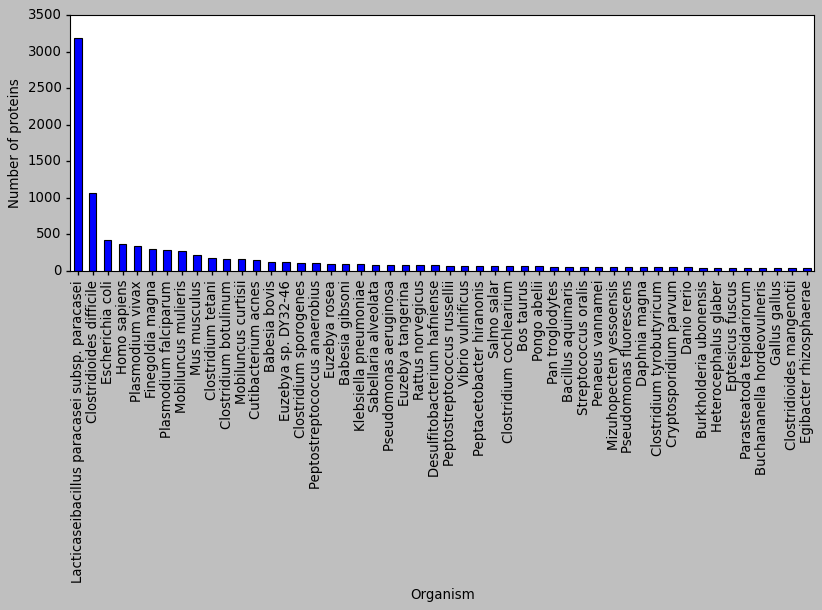

In [20]:
labels, values = zip(*c.most_common(50))

df_org = pd.DataFrame({'species': labels, 'freqs': values})
ax = df_org.plot(kind='bar', x=0, y=1, legend=False, figsize=(12,4))
# ax.set_title('Organisms distribution')
ax.set_xlabel('Organism')
ax.set_ylabel('Number of proteins')
plt.savefig('figs/org_contain_protein_dist.pdf', bbox_inches='tight')

# indexes = np.arange(len(labels))
# width = 1

# plt.figure(figsize=(12,3))
# plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels, rotation=90)

# plt.show()


In [21]:
# df = pd.DataFrame(dist, columns=['dist'])
# g = sns.catplot(data=df_org, x='species', y='freqs', kind='bar', height=7, aspect=3)
# g.set_xlabels('Organism')
# g.set_ylabels('Number of proteins')
# g.set_xticklabels(rotation=90)
# g.set(title='Organism distribution')
# g.savefig('sns_figs/org_seq_dist.pdf')

### Hu, for all taxonomy, Dist of o.taxonomy

In [7]:
taxo_all = []
for o in records:
    taxo_all.extend(o.taxonomy) # One protein might have multiple taxonomy

In [10]:
counts = 0
for o in records:
    # tax_name = 'artificial sequences'
    tax_name = 'Lophotrochozoa'
    if tax_name in o.taxonomy:
        counts += 1
        print_example(o)
ic(counts)
        

ic| ex.id: 'AAY46226.1'
    ex.name: 'AAY46226'
    ex.features: [SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(561)), type='source'),
                  SeqFeature(FeatureLocation(ExactPosition(0), 

ExactPosition(561)), type='Protein'),
                  SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(561)), type='CDS')]
    ex.description: 'foot protein 1 variant 1 [Perna viridis]'
    ex.taxonomy: ['Eukaryota',
                  'Metazoa',
                  'Spiralia',
                  'Lophotrochozoa',
                  'Mollusca',
                  'Bivalvia',
                  'Autobranchia',
                  'Pteriomorphia',
                  'Mytiloida',
                  'Mytiloidea',
                  'Mytilidae',
                  'Mytilinae',
                  'Perna']
    ex.organism: 'Perna viridis'
    ex.source: 'Perna viridis (Asian green mussel)'
    ex.seq: Seq('MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWKVHPPAWTAWKAHPP...AYG')
ic| ex.id: 'AAY46227.1'
    ex.name: 'AAY46227'
    ex.features: [SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(431)), type='source'),
                  SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(431))

353

### Use a Tree to show the hierarchy.

In [22]:
class TreeNode:
    def __init__(self, val=0):
        self.val = val
        self.map = {}


In [27]:
first_layer = []
second_layer = []
root = TreeNode(0)
prev = root
first_map = {}
for o in records:
    prev = root
    for i, s in enumerate(o.taxonomy):
        if not prev.map.get(o.taxonomy[i], None):
            # ic()
            prev.map[o.taxonomy[i]] = TreeNode(o.taxonomy[i])
        prev = prev.map[o.taxonomy[i]]
# len(first_layer)
root.map


{'Bacteria': <__main__.TreeNode at 0x151603154850>,
 'Eukaryota': <__main__.TreeNode at 0x151603154b10>,
 'Archaea': <__main__.TreeNode at 0x15160312e150>,
 'Viruses': <__main__.TreeNode at 0x15160312ebd0>,
 'other sequences': <__main__.TreeNode at 0x151603097750>}

In [36]:
for k, v in root.map.items():
    print(k)
    for k2, v2 in v.map.items():
        print('\t' + k2)
        for k3, v3 in v2.map.items():
            print('\t\t' + k3)
            for k4, v4 in v3.map.items():
                print('\t\t\t' + k4)
                for k5, v5 in v4.map.items():
                    print('\t\t\t\t' + k5)
                    for k6, v6 in v5.map.items():
                        print('\t\t\t\t\t' + k6)


Bacteria
	Proteobacteria
		Betaproteobacteria
			Burkholderiales
				Oxalobacteraceae
					Massilia
					Janthinobacterium
				Comamonadaceae
					Acidovorax
					Caenimonas
					Melaminivora
					Polaromonas
					Ramlibacter
					Comamonas
					Variovorax
				Alcaligenaceae
					Alcaligenes
				Aquabacterium
					unclassified Aquabacterium
				Burkholderiaceae
					Burkholderia
					Cupriavidus
					Paucimonas
					Ralstonia
				Ideonella
					unclassified Ideonella
				Paucibacter
				Piscinibacter
				Rubrivivax
					unclassified Rubrivivax
			Neisseriales
				Chromobacteriaceae
					Chromobacterium
				Neisseriaceae
					Neisseria
			Rhodocyclales
				Rhodocyclaceae
					Propionivibrio
				Zoogloeaceae
					Zoogloea
		Gammaproteobacteria
			Salinisphaerales
				Salinisphaeraceae
					Abyssibacter
					Salinisphaera
			Thiotrichales
				Thiotrichaceae
					Achromatium
					Leucothrix
					Thiothrix
				Thiofilaceae
					Thiofilum
				Piscirickettsiaceae
					Thiomicrorhabdus
			Pseu

In [13]:
c_first_layer = collections.Counter(first_layer)
c_first_layer.most_common(10)

[('Bacteria', 15579),
 ('Eukaryota', 8936),
 ('Archaea', 161),
 ('Viruses', 17),
 ('other sequences', 14)]

In [19]:
c_second_layer = collections.Counter(second_layer)
c_second_layer.most_common(100)
# len(c_second_layer)

[('Firmicutes', 8306),
 ('Metazoa', 7317),
 ('Actinobacteria', 3347),
 ('Proteobacteria', 3187),
 ('Sar', 1259),
 ('Bacteroidetes', 664),
 ('Alveolata', 144),
 ('Viridiplantae', 118),
 ('Fungi', 83),
 ('Euryarchaeota', 82),
 ('Thaumarchaeota', 76),
 ('Fibrobacteres', 35),
 ('artificial sequences', 14),
 ('Varidnaviria', 10),
 ('Isachenkonia', 10),
 ('Chloroflexi', 5),
 ('Candidatus Gribaldobacteria', 5),
 ('Candidatus Saccharibacteria', 5),
 ('Duplodnaviria', 5),
 ('Amoebozoa', 4),
 ('Choanoflagellata', 4),
 ('Cyanobacteria', 3),
 ('environmental samples', 3),
 ('Planctomycetes', 2),
 ('Cryptophyceae', 2),
 ('Tenericutes', 2),
 ('Metamonada', 2),
 ('Discoba', 2),
 ('Acidobacteria', 1),
 ('Candidatus Bathyarchaeota', 1),
 ('Nitrospinae/Tectomicrobia group', 1),
 ('Riboviria', 1),
 ('Nudiviridae', 1),
 ('Stramenopiles', 1),
 ('Aquificae', 1),
 ('Crenarchaeota', 1),
 ('Spirochaetes', 1),
 ('Fusobacteria', 1),
 ('Candidatus Thermoplasmatota', 1)]

In [8]:
c_all = collections.Counter(taxo_all)
ic(len(c_all))

c_sort = c_all.most_common()
ic(type(c_sort))
c_sort[-200:] # Last 200

ic| len(c_all): 3111
ic| type(c_sort): <class 'list'>


[('Mollisiaceae', 1),
 ('Phialocephala', 1),
 ('Phoenicibacter', 1),
 ('unclassified Photobacterium', 1),
 ('Photorhabdus', 1),
 ('Cajanus', 1),
 ('Piscinibacter', 1),
 ('Planifilum', 1),
 ('Mycetozoa', 1),
 ('Protosteliales', 1),
 ('Cavosteliaceae', 1),
 ('Planoprotostelium', 1),
 ('Pletholax', 1),
 ('Polaromonas', 1),
 ('Polycyclovorans', 1),
 ('Povalibacter', 1),
 ('Prauserella', 1),
 ('Prevotellaceae', 1),
 ('Prevotella', 1),
 ('Pricia', 1),
 ('Pristurus', 1),
 ('Promicromonospora', 1),
 ('Propionimicrobium', 1),
 ('Pseudactinotalea', 1),
 ('unclassified Pseudactinotalea', 1),
 ('Leotiomycetes incertae sedis', 1),
 ('Pseudeurotiaceae', 1),
 ('Pseudogymnoascus', 1),
 ('unclassified Pseudogymnoascus', 1),
 ('Pseudomaricurvus', 1),
 ('unclassified Pseudomonas', 1),
 ('Pseudoteredinibacter', 1),
 ('Putridiphycobacter', 1),
 ('Tenebrionidae', 1),
 ('Tenebrionidae incertae sedis', 1),
 ('Tribolium', 1),
 ('Pitheciidae', 1),
 ('Callicebinae', 1),
 ('Plecturocebus', 1),
 ('Rhodoglobus', 1)

In [9]:

taxo_top = c_all.most_common(200) # list the top 200 taxonomys
taxo_top
## run below here

[('Bacteria', 15579),
 ('Eukaryota', 8936),
 ('Firmicutes', 8306),
 ('Metazoa', 7317),
 ('Chordata', 6080),
 ('Craniata', 6061),
 ('Vertebrata', 6061),
 ('Euteleostomi', 6040),
 ('Bacilli', 4441),
 ('Clostridia', 3472),
 ('Clostridiales', 3434),
 ('Lactobacillales', 3375),
 ('Actinobacteria', 3347),
 ('Lactobacillaceae', 3228),
 ('Lacticaseibacillus', 3193),
 ('Proteobacteria', 3187),
 ('Mammalia', 2785),
 ('Eutheria', 2742),
 ('Gammaproteobacteria', 2117),
 ('Peptostreptococcaceae', 1650),
 ('Euarchontoglires', 1574),
 ('Micrococcales', 1525),
 ('Actinopterygii', 1444),
 ('Neopterygii', 1426),
 ('Teleostei', 1415),
 ('Alveolata', 1393),
 ('Apicomplexa', 1365),
 ('Clostridiaceae', 1259),
 ('Sar', 1259),
 ('Clostridium', 1202),
 ('Clostridioides', 1099),
 ('Laurasiatheria', 1072),
 ('Bacillales', 1066),
 ('Microbacteriaceae', 1050),
 ('Aconoidasida', 1031),
 ('Archelosauria', 981),
 ('Archosauria', 910),
 ('Neoteleostei', 880),
 ('Acanthomorphata', 880),
 ('Dinosauria', 877),
 ('Saurisc

### Top 50 just for visualization.

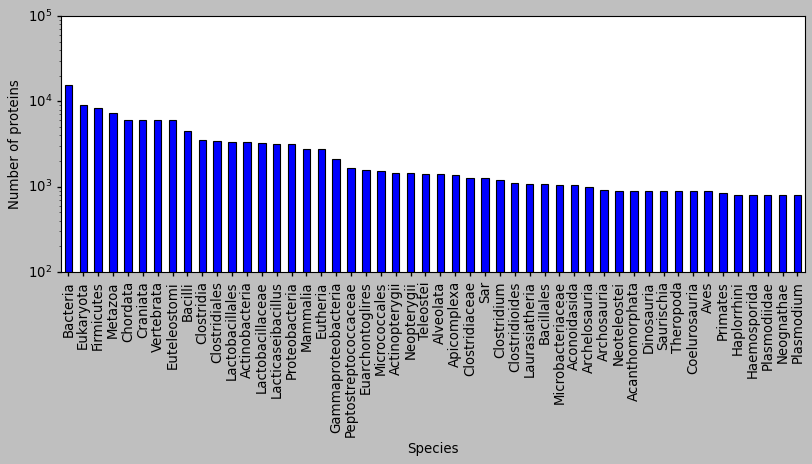

In [33]:
selected = taxo_top[:50]
labels, values = zip(*selected)
# indexes = np.arange(len(labels))
# width = 1
# fig, ax = plt.subplots(1,1, figsize=(12,3))
# ax.bar(indexes, values, width)
# ax.set_title('Taxonomy Distribution')
# ax.set_xticks(indexes+width*0.5)
# ax.set_xticklabels(labels, rotation=90)
# # ax[1].hist(dist, bins=20, log=True)
# # ax[1].set_title('histogram (y: log)')
# plt.show()

df_taxo = pd.DataFrame({'species': labels, 'freqs': values})
ax = df_taxo.plot(kind='bar', x=0, y=1, legend=False, figsize=(12,4), logy=True)
# ax.set_title('Taxonomy distribution')
ax.set_ylabel('Number of proteins')
ax.set_xlabel('Species')

# plt.figure(figsize=(12,3))
# plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels, rotation=90)
# plt.show()
plt.savefig('figs/species_dist.pdf', bbox_inches='tight')

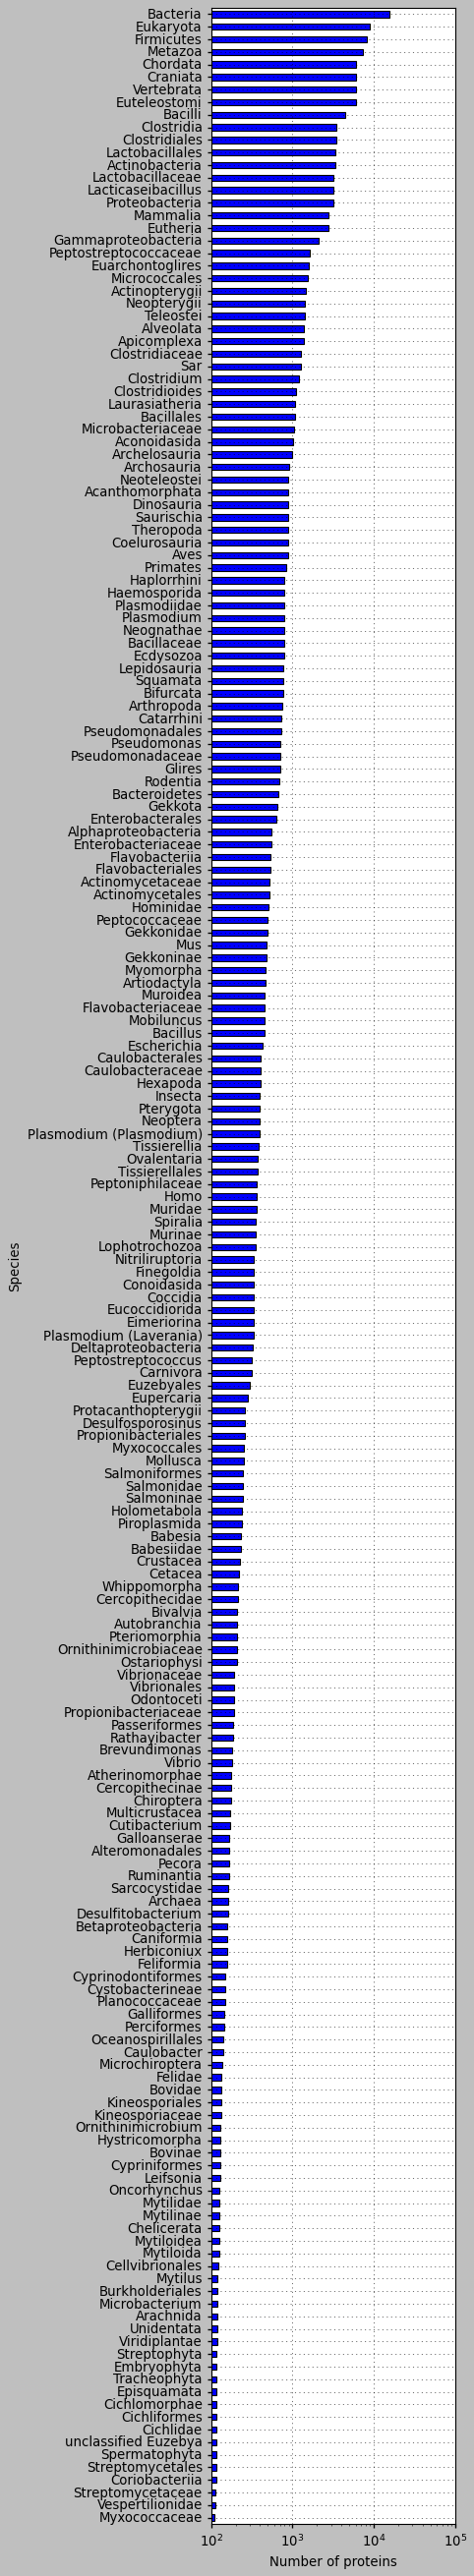

In [44]:
selected = taxo_top[:200]
labels, values = zip(*selected)
# indexes = np.arange(len(labels))
# width = 1
# fig, ax = plt.subplots(1,1, figsize=(12,3))
# ax.bar(indexes, values, width)
# ax.set_title('Taxonomy Distribution')
# ax.set_xticks(indexes+width*0.5)
# ax.set_xticklabels(labels, rotation=90)
# # ax[1].hist(dist, bins=20, log=True)
# # ax[1].set_title('histogram (y: log)')
# plt.show()

df_taxo = pd.DataFrame({'species': labels, 'freqs': values})
df_barh = df_taxo.sort_values(by='freqs', ascending=True)
ax = df_barh.plot(kind='barh', x=0, y=1, legend=False, figsize=(4,40), logx=True, grid=True)
# ax.set_title('Taxonomy distribution')
ax.set_xlabel('Number of proteins')
ax.set_ylabel('Species')

# plt.figure(figsize=(12,3))
# plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels, rotation=90)
# plt.show()
plt.savefig('figs/species_contain_protein_dist_barh.pdf', bbox_inches='tight')

In [28]:
# df = pd.DataFrame(dist, columns=['dist'])
# g = sns.catplot(data=df_taxo, x='species', y='freqs', kind='bar', height=5, aspect=2)
# g.set_xlabels('Species')
# g.set_ylabels('Number of proteins')
# g.set_xticklabels(rotation=90)
# g.set(title='Top 50 species distribution')
# g.savefig('sns_figs/species_protein_dist.pdf')

### utils defs

In [69]:
# %%file -a utils.py
aa = 'ARNDCQEGHILKMFPSTWYV'
aa_property = {'1': 'small',
               '2': 'nucleophilic',
               '3': 'hydrophobic',
               '4': 'aromatic',
               '5': 'acidic',
               '6': 'amide',
               '7': 'basic'}

# Subgroups classification.
aasub = {'G': '1', 'A': '1',
         'S': '2', 'T': '2', 'C': '2',
         'V': '3', 'L': '3', 'I': '3', 'M': '3', 'P': '3',
         'F': '4', 'Y': '4', 'W': '4',
         'D': '5', 'E': '5',
         'N': '6', 'Q': '6',
         'H': '7', 'K': '7', 'R': '7'}

In [70]:
# %%file -a utils.py

def pname(s):
    i, j = s
    return aa_property[i] + ' - ' + aa_property[j]

### SeqIO.Write

In [24]:
len(records)

24707

In [25]:
selected = [r for r in records if len(set(r.seq) - set(aa)) == 0]

In [26]:
len(selected) # 24264

24264

In [79]:
with open('seq_mining.dat', 'w') as f: # only write the r.seq
    for r in selected:
        print(' '.join(r.seq), file=f)

### Hu, top200 process for taxonomy for .fa files generations

In [22]:
# [o for o in records for ]
from collections import defaultdict
seqs_taxo = defaultdict(list)
"""Key: a speice, Value: a list of all sequences under this speice."""
for o in records:
    for tk, tv in taxo_top:
        if tk in o.taxonomy:
            seqs_taxo[tk].append(SeqRecord(o.seq, o.id, o.name, o.description))

### Top50 violin plot.

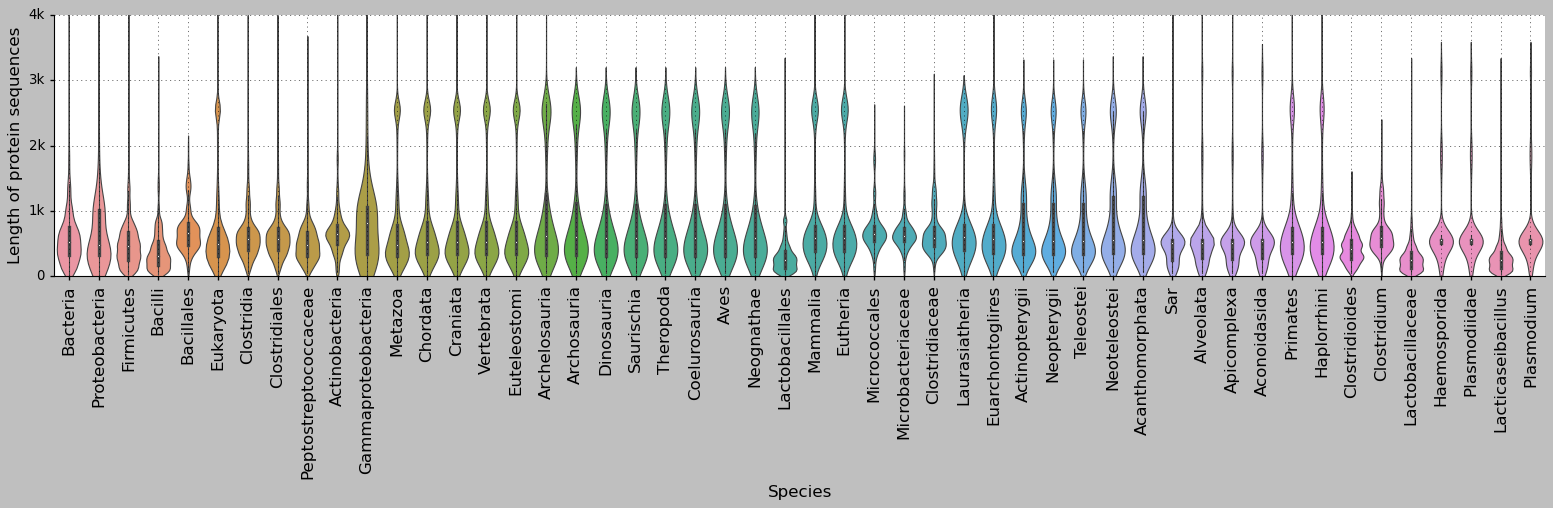

In [65]:
# [o for o in records for ]
from collections import defaultdict
list_s = list()
list_l = list()

seqs_taxo_50 = defaultdict(list)
"""Key: a speice, Value: a list of all sequences under this speice."""
for o in records:
    for tk, tv in taxo_top[:50]:
        if tk in o.taxonomy:
            list_s.append(tk)
            list_l.append(len(o.seq))

df_dict = {'species': list_s, 'length': list_l}
df_50 = pd.DataFrame(df_dict)
df_50
g = sns.catplot(data=df_50, x='species', y='length', kind='violin', height=4, aspect=5, scale='width')
g.set_xlabels('Species', fontsize=15)
g.set_ylabels('Length of protein sequences', fontsize=15)
g.set_xticklabels(rotation=90, fontsize=15)
g.set(ylim=(0, 4000))
g.set(yticks=[0,1000,2000,3000,4000])
g.set_yticklabels(['0', '1k', '2k', '3k', '4k'])
plt.grid()
# sns.set(font_scale=1.5)
# g.set(title='Top 50 species sequence distribution')
g.savefig('sns_figs/species_protein_seq_dist_violin_crop.pdf')

### Top200 violin plot.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


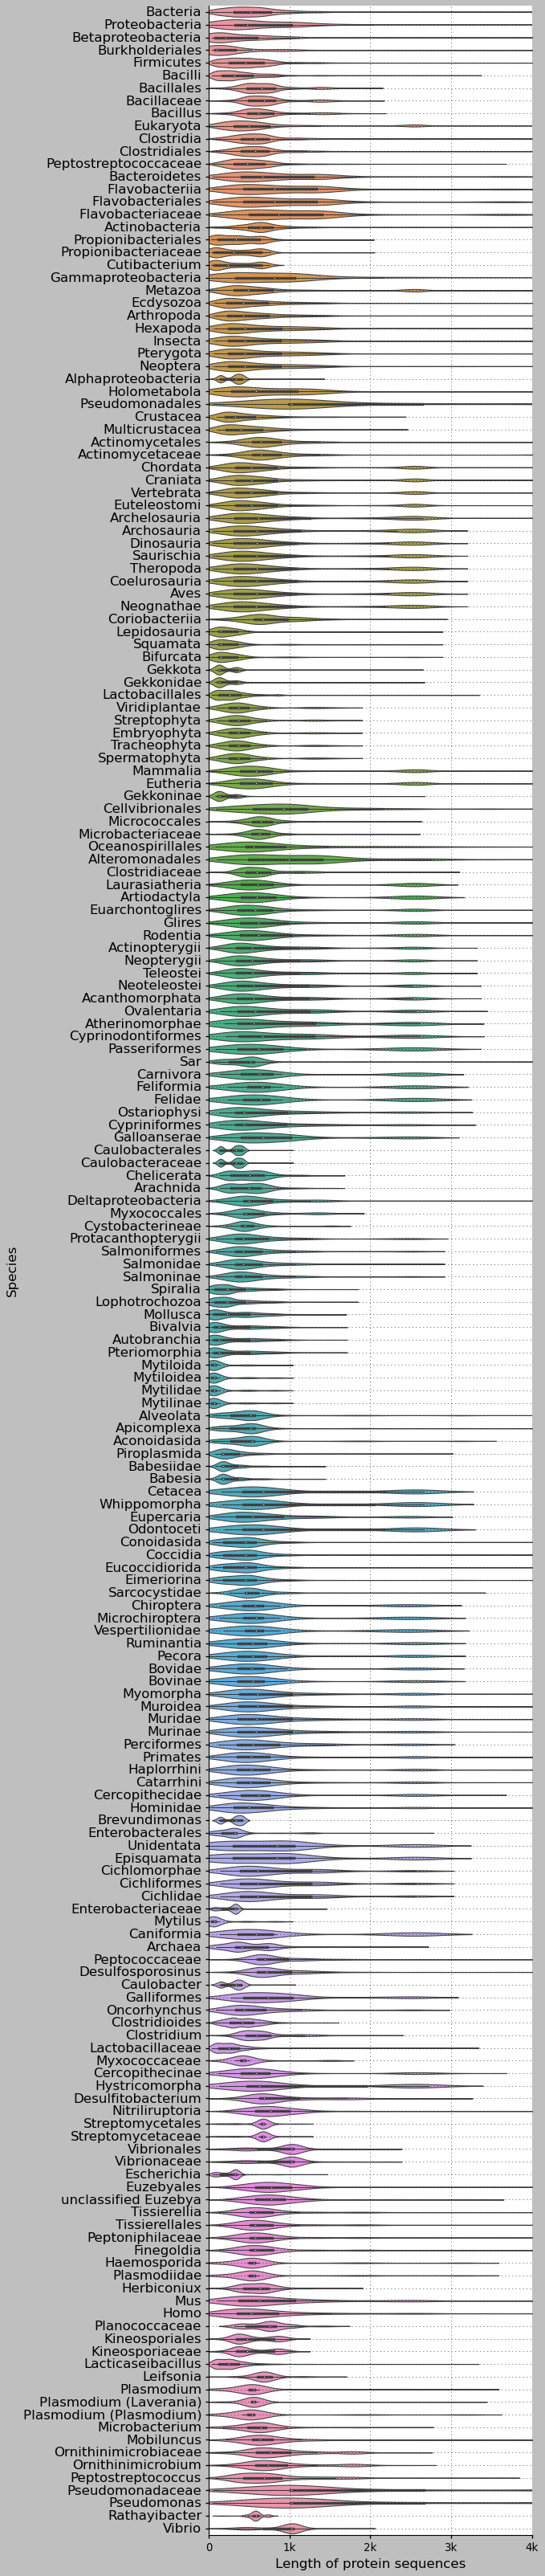

In [10]:
# [o for o in records for ]
from collections import defaultdict
list_s = list()
list_l = list()

# sns.set_style('ticks')
"""Key: a speice, Value: a list of all sequences under this speice."""
for o in records:
    for tk, tv in taxo_top[:200]:
        if tk in o.taxonomy:
            list_s.append(tk)
            list_l.append(len(o.seq))

df_dict = {'species': list_s, 'length': list_l}
df_200 = pd.DataFrame(df_dict)
df_200
g = sns.catplot(data=df_200, x='length', y='species', kind='violin', height=40, aspect=0.2, orient='h', scale='width')
g.set_ylabels('Species', fontsize=15)
g.set_xlabels('Length of protein sequences', fontsize=15)
g.set_yticklabels(fontsize=15)
g.set(xlim=(0, 4000))
g.set(xticks=[0,1000,2000,3000,4000])
g.set_xticklabels(['0', '1k', '2k', '3k', '4k'])
plt.grid()
# sns.set(font_scale=1.5)
# g.set(title='Top 50 species sequence distribution')
g.savefig('sns_figs/species_protein_seq_dist_violin_crop_vioh.pdf')

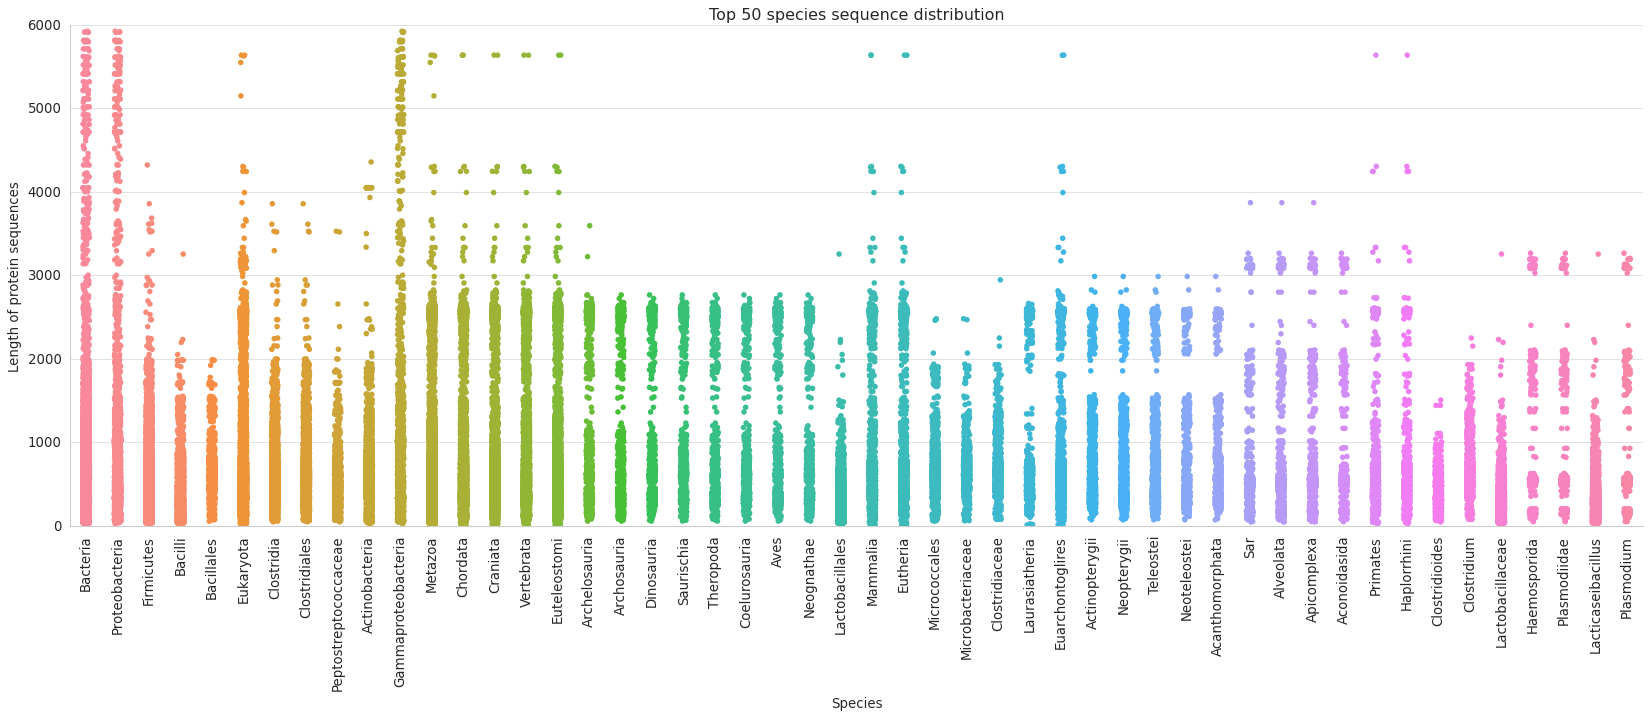

In [119]:
# [o for o in records for ]
from collections import defaultdict
list_s = list()
list_l = list()

seqs_taxo_50 = defaultdict(list)
"""Key: a speice, Value: a list of all sequences under this speice."""
for o in records:
    for tk, tv in taxo_top[:50]:
        if tk in o.taxonomy:
            list_s.append(tk)
            list_l.append(len(o.seq))

df_dict = {'species': list_s, 'length': list_l}
df_50 = pd.DataFrame(df_dict)
df_50
g = sns.catplot(data=df_50, x='species', y='length', kind='strip', height=7, aspect=3)
g.set_xlabels('Species')
g.set_ylabels('Length of protein sequences')
g.set_xticklabels(rotation=90)
g.set(ylim=(0, 6000))
g.set(title='Top 50 species sequence distribution')
g.savefig('sns_figs/species_protein_seq_dist_strip.pdf')

In [72]:
seqs_taxo_50.keys()

dict_keys(['Bacteria', 'Proteobacteria', 'Firmicutes', 'Bacilli', 'Bacillales', 'Eukaryota', 'Clostridia', 'Clostridiales', 'Peptostreptococcaceae', 'Actinobacteria', 'Gammaproteobacteria', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Archelosauria', 'Archosauria', 'Dinosauria', 'Saurischia', 'Theropoda', 'Coelurosauria', 'Aves', 'Neognathae', 'Lactobacillales', 'Mammalia', 'Eutheria', 'Micrococcales', 'Microbacteriaceae', 'Clostridiaceae', 'Laurasiatheria', 'Euarchontoglires', 'Actinopterygii', 'Neopterygii', 'Teleostei', 'Neoteleostei', 'Acanthomorphata', 'Sar', 'Alveolata', 'Apicomplexa', 'Aconoidasida', 'Primates', 'Haplorrhini', 'Clostridioides', 'Clostridium', 'Lactobacillaceae', 'Haemosporida', 'Plasmodiidae', 'Lacticaseibacillus', 'Plasmodium'])

In [29]:
# pickle the seqs_taxo:dict[names,list[seqs]] (200)
"""Collated species sequences saved."""
import pickle
with open("seqs_taxo.pkl", "wb") as f:
    pickle.dump(seqs_taxo, f)

In [45]:
print(seqs_taxo.keys())

dict_keys(['Bacteria', 'Proteobacteria', 'Betaproteobacteria', 'Burkholderiales', 'Firmicutes', 'Bacilli', 'Bacillales', 'Bacillaceae', 'Bacillus', 'Eukaryota', 'Clostridia', 'Clostridiales', 'Peptostreptococcaceae', 'Bacteroidetes', 'Flavobacteriia', 'Flavobacteriales', 'Flavobacteriaceae', 'Actinobacteria', 'Propionibacteriales', 'Propionibacteriaceae', 'Cutibacterium', 'Gammaproteobacteria', 'Metazoa', 'Ecdysozoa', 'Arthropoda', 'Hexapoda', 'Insecta', 'Pterygota', 'Neoptera', 'Alphaproteobacteria', 'Holometabola', 'Pseudomonadales', 'Crustacea', 'Multicrustacea', 'Actinomycetales', 'Actinomycetaceae', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Archelosauria', 'Archosauria', 'Dinosauria', 'Saurischia', 'Theropoda', 'Coelurosauria', 'Aves', 'Neognathae', 'Coriobacteriia', 'Lepidosauria', 'Squamata', 'Bifurcata', 'Gekkota', 'Gekkonidae', 'Lactobacillales', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Mammalia', 'Eutheria', 'Gekkoninae', 

In [47]:
# name.fa file, stores all sequences belonging to this name tax.
for k, v in seqs_taxo.items():
    SeqIO.write(v, f'fa_files/{k}.fa', 'fasta')

## .fa -> common sequence .aln for ONE taxonomy.
### Finish the clustalw mega computation for .fa files, generating .aln (by first_eval/fa_files/run_clustalo.sh )
### Then compute consensus file for each, and paired statistics file for each.

In [1]:
# %%file -a utils.py
from Bio import AlignIO
from Bio.Align import AlignInfo

In [10]:
"""Test if the common sequence is correct for Bacteria.aln."""
# align = AlignIO.read("aln_files/Bivalvia.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
align = AlignIO.read("clustalw-2.1-linux-x86_64-libcppstatic/yyy.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
summary_align = AlignInfo.SummaryInfo(align)
consensus = summary_align.dumb_consensus()
header = 'MSA Consensus of len seqs, protein'
print(SeqRecord(consensus, header, '', '').format('fasta'))

>MSA Consensus of len seqs, protein
MFVRLWNCLLYTIVYCIPYVCGIVYCIPYVCGIVYCTPYVCGIVYCTPYVCGIVYCTPYV
CGIVYCTPYVCGIVYCTPYVCGIVYCTPYVCGIVYCTPYVCGIVYCTPYVCGIVYCTPYV
CGIVYCTPYVCGIVYCTPYVCGIVYCTPYVCGIVYCTPYVCGIVYCTPYVCGIVYCTPYV
CGIVYCTPYVCGIVYCTPYVCGIVYCTPYVCGIVYCTPYVCGIVYCTPYVCXXXXXXXXX
XXXXXXXXXXXXXXXXXXXVXGXXYXGAXXXXXXXXXXXXXXXXXXXPXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXQPXYXXXXXXXXXYXXXXXXXXXYXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXPXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXPXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXGXXXXXXXTXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
"""Compute for all .aln files.
    Return: consensus_files, adjacent pair_files
"""
# Iterate in the aln_files folder, producing con_files/*
for k,v in seqs_taxo.items():
    align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    summary_align = AlignInfo.SummaryInfo(align)
    consensus = summary_align.dumb_consensus()
    header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    with open(f'con_files/{k}.txt', 'w') as f:
        print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # Producing pair_files/*
    tseq = str(consensus)
    # Note here is the counting rules for common sequence.
    # Remove those in 'XAGP'
    n_tseq = [cc for cc in tseq if cc not in 'XAGP'] # in 'X'
    # Group the A into 6 categories.
    pseq = ''.join([aasub[b] for b in n_tseq])
    # 2-gram sliding along the index 0.
    pair = [pname(sorted(pseq[i:i+2])) for i in range(len(pseq)-1)]
    c = collections.Counter(pair)
    # c.most_common()
    with open(f'pair_files/{k}.txt', 'w') as f:
        print(c.most_common(), file=f)


# END for gb_analysis.ipynb, the follow-ups are in histogram_visualize.ipynb